# Prediction with Regression Delivery Data Simple Linear Regression Project

# Prediction with Regression Delivery Data Simple Linear Regression Project

In [1]:
## Importing the Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [68]:
# Loading the dataset from system
data = pd.read_csv('D:/Top Mentor/Classes Details/07th April 2024/Assignment/Project - 1&2_ Simple_Reg/Salary_Data.csv')
print(data.head(2))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0


In [69]:
## Copy our data that our main data will be actual -:
df = data.copy()
print(df.head(2))

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0


In [71]:
## Data Reading Basic Steps :-
print('Min Exp  - ',df['YearsExperience'].min())
print('Max Exp  - ',df['YearsExperience'].max())
print('Min Salary  - ',df['Salary'].min())
print('Max Salary - ',df['Salary'].max())

Min Exp  -  1.1
Max Exp  -  10.5
Min Salary  -  37731.0
Max Salary -  122391.0


In [72]:
##Checking Data Parameter :-
print('no of columns - ' , df.columns)
print('no of shapes - ' , df.shape)
print('no of lenght - ' , len(df))
print('no of datatype - \n' , df.dtypes)

no of columns -  Index(['YearsExperience', 'Salary'], dtype='object')
no of shapes -  (30, 2)
no of lenght -  30
no of datatype - 
 YearsExperience    float64
Salary             float64
dtype: object


In [ ]:
## We are doing EDA on the data - 

In [73]:
print(data.describe())

       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


In [74]:
## Checking the null values - 
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

0.37956024064804106


C:\Users\DELL\AppData\Local\Temp\ipykernel_22152\2818512424.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = data['YearsExperience'])
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


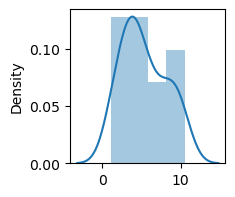

In [75]:
plt.figure(figsize=(2,2))
sns.distplot( x = data['YearsExperience'])
print (data['YearsExperience'].skew())

0.35411967922959153


C:\Users\DELL\AppData\Local\Temp\ipykernel_22152\785234701.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( x = data['Salary'])
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


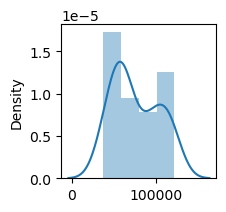

In [76]:
plt.figure(figsize=(2,2))
sns.distplot( x = data['Salary'])
print (data['Salary'].skew())

<Axes: xlabel='YearsExperience', ylabel='Salary'>

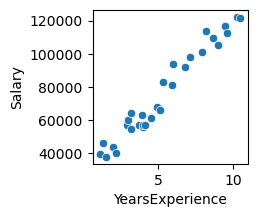

In [77]:
plt.figure(figsize=(2,2))
sns.scatterplot(x = data['YearsExperience'] , y = data['Salary'])

NameError: name 'graphs_folder' is not defined

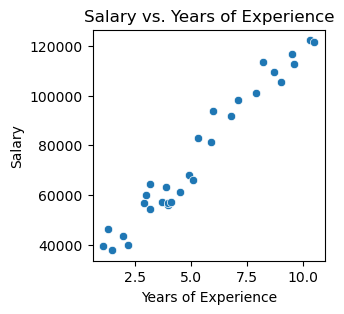

In [103]:
plt.figure(figsize=(3, 3))
sns.scatterplot(x=data["YearsExperience"], y=data["Salary"])
plt.title("Salary vs. Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.savefig(f"{graphs_folder}/salary_vs_experience_scatter.png")

In [ ]:
### Sampling of Data  - Splitting the data into Training & Testing 

In [22]:
from sklearn.model_selection import train_test_split

In [78]:
X = data['YearsExperience'].values.reshape(-1,1)
X

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [79]:
y = data['Salary'].values.reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [80]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [81]:
X_train.shape , y_train.shape

((24, 1), (24, 1))

In [82]:
X_test.shape , y_test.shape

((6, 1), (6, 1))

In [29]:
### Modeling of Data

In [83]:
model = LinearRegression()
model

LinearRegression()

In [84]:
model_train = model.fit(X_train , y_train)
print('Model Training is completed')

Model Training is completed


In [ ]:
## Validated the model & The Evaluated

In [85]:
pred = model.predict(X_train)
print(pred)

[[ 72153.95280301]
 [ 60709.59477696]
 [123653.5639202 ]
 [ 55941.11226611]
 [ 63570.68428347]
 [ 93135.27585075]
 [ 62616.9877813 ]
 [ 82644.61432688]
 [ 81690.91782471]
 [111255.50939198]
 [ 37820.87872488]
 [ 63570.68428347]
 [ 53080.0227596 ]
 [ 46404.14724441]
 [ 64524.38078564]
 [ 68339.16679432]
 [100764.84786811]
 [ 44496.75424007]
 [116023.99190283]
 [125560.95692454]
 [ 55941.11226611]
 [ 90274.18634424]
 [ 54033.71926177]
 [103625.93737462]]


In [86]:
pred = model.predict(X_test)
print(pred)

[[116977.688405  ]
 [ 75968.73881169]
 [108394.41988547]
 [ 74061.34580735]
 [ 39728.27172922]
 [ 35913.48572054]]


In [87]:
pred = model.predict(y_train)
print(pred)

[[6.47947752e+08]
 [5.45434915e+08]
 [1.16726411e+09]
 [5.19265483e+08]
 [5.32130849e+08]
 [9.37251586e+08]
 [6.02933278e+08]
 [8.95927917e+08]
 [7.75981508e+08]
 [1.00695726e+09]
 [4.40680892e+08]
 [5.43222340e+08]
 [5.40218196e+08]
 [3.80464495e+08]
 [5.44404923e+08]
 [5.82838892e+08]
 [9.66139053e+08]
 [4.15121825e+08]
 [1.11555468e+09]
 [1.16231442e+09]
 [6.14635134e+08]
 [8.74927520e+08]
 [5.73673869e+08]
 [1.08544649e+09]]


In [88]:
pred = model.predict(y_test)
print(pred)

[[1.07422148e+09]
 [7.92432773e+08]
 [1.04366504e+09]
 [6.29741686e+08]
 [3.59864650e+08]
 [3.75238238e+08]]


In [ ]:
#### compare with the Actual and Check the accuracy - 

In [89]:
y_test

array([[112635.],
       [ 83088.],
       [109431.],
       [ 66029.],
       [ 37731.],
       [ 39343.]])

In [90]:
pred

array([[1.07422148e+09],
       [7.92432773e+08],
       [1.04366504e+09],
       [6.29741686e+08],
       [3.59864650e+08],
       [3.75238238e+08]])

In [ ]:
#rsquare values  - to check the strength of the Model - 0 to 1
### if it is closer to 1 , that means the Model is Strong , closer to 0 weak model
##### mean squared error / root mean squared error 

In [91]:
from sklearn.metrics import r2_score , mean_squared_error
from math import sqrt

In [92]:
print('r2_score - ',r2_score(y_test,pred))

r2_score -  -654121602.4059381


In [93]:
print('sqrt mean sqrd error - ' , sqrt(mean_squared_error(y_test,pred)))

sqrt mean sqrd error -  767819119.1463792


In [94]:
print('mean sqr error - ',mean_squared_error(y_test,pred))

mean sqr error -  5.895461997267218e+17


<Axes: >

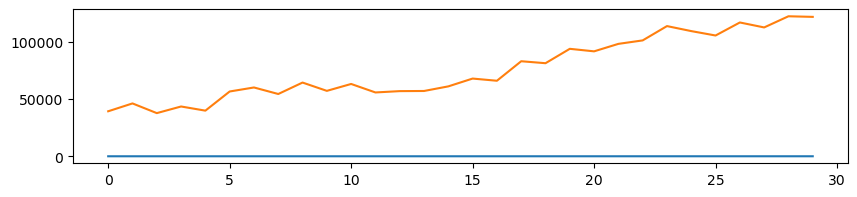

In [95]:
plt.figure(figsize=(10,2))
data['YearsExperience'].plot()
data['Salary'].plot()